# Tarea 2
La tarea consiste, de una forma resumida, en el trabajo y análisis de filtros aplicados a imagenes.

Anteriormente trabajamos con operaciones a nivel de pixel, las cuales eran aplicadas a un pixel y no importaba las caracteristicas de pixeles vecinos.

Un filtro también es una operación (de cierta forma, aunque formalmente decimos que es una función) que se le aplica a un pixel, sin embargo, este si depende de ciertos pixeles vecinos/cercanos.

### Problema 1 
Los filtros a crear son:
$$ 
\text{Filtro 1} = \left(\begin{matrix}
0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0\\
1/5 & 1/5 & 1/5 & 1/5 & 1/5\\
0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0
\end{matrix}\right) \quad\quad :\quad\text{dim(Filtro 1)}=5\times5
$$
$$ 
\text{Filtro 2} = \left(\begin{matrix}
0 & 0 & \cdots & 0 & 0\\
0 & 0 & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & \cdots & 0 & 0\\
1/45 & 1/45 & \cdots & 1/45 & 1/45\\
0 & 0 & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & \cdots & 0 & 0\\
0 & 0 & \cdots & 0 & 0
\end{matrix}\right)\quad\quad :\quad\text{dim(Filtro 2)}=45\times45
$$

A pura vista, podemos ver que este filtro afecta principalmente en una zona horizontal. Además, parece ser una especie de promedio entre los k vecinos proximos en la misma fila.

Recordando un poco las clases, nosotros jugamos un poco con el filtro de caja (usando un promedio), y vimos que promediabamos a los veciones mas cercanos del pixel actual (en total fueron 8 los que eran frontera con este), y lo que nos producia era un blur en la imagen.

El Blur se produce debido que como estamos promediando las intensidades de los pixeles, estas tienen una menor varianza y los colores se parezcan más.

Con el filtro 1 de esta imagen esperamos que se produzca un blur, probablemente no tan intenso, ya que solo toma a consideración los 4 vecinos horizontales más cercanos del pixel actual.

Sin embargo, el filtro 2 tienda a promediar muchos más pixeles, por lo que el Blur debería notarse de una mejor forma.

### Filtro extra : Filtro vertical
En nuestro trabajo agregamos un tercer filtro a esta parte que tiene caracteristicas similares, simplemente para ver que pasaba, se puede omitir en la revisión de tarea.

El filtro 3 corresponde a una versión vertical:
$$ 
\text{Filtro 3} = \left(\begin{matrix}
0 & \cdots & 1/45 & \cdots & 0\\
0 & \cdots & 1/45 & \cdots & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
0 & \cdots & 1/45 & \cdots & 0\\
0 & \cdots & 1/45 & \cdots & 0\\
\end{matrix}\right)\quad\quad :\quad\text{dim(Filtro 3)}=45\times45
$$

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

Primero creamos los filtros necesarios:

In [ ]:
filter_1 = np.zeros((5,5),np.float32)
filter_1[2,:] = 1.0/5

filter_2 = np.zeros((45,45),np.float32)
filter_2[23,:] = 1.0/45

filter_3 = np.zeros((45,45),np.float32)
filter_3[:,23] = 1.0/45


In [ ]:
print(filter_3[0,23])

Ahora que tenemos los filtros que usaremos, los aplicamos:

In [ ]:
image = cv.imread("elysium.jpg",cv.IMREAD_GRAYSCALE)

filtered_image1 = cv.filter2D(image,ddepth=-1,kernel=filter_1)
filtered_image2 = cv.filter2D(image,ddepth=-1,kernel=filter_2)
filtered_image3 = cv.filter2D(image,ddepth=-1,kernel=filter_3)

plt.figure(figsize=(15,20))

plt.subplot(4,1,1)
plt.imshow(image,cmap="gray")
plt.title('Original_image')
plt.axis('off')

plt.subplot(4,1,2)
plt.imshow(filtered_image1,cmap="gray")
plt.title('Filter 1')
plt.axis('off')

plt.subplot(4,1,3)
plt.imshow(filtered_image2,cmap="gray")
plt.title('Filter 2')
plt.axis('off')

plt.subplot(4,1,4)
plt.imshow(filtered_image3,cmap="gray")
plt.title('Filter 3')
plt.axis('off')

plt.show()

### Análizando una sección de la imagen
Viendo los filtros anteriores, vemos claramente que se produce un blur en la imagen, sin embargo, análizaremos un poco más de cerca para ver el comportamiento de este.

Para realizar este análisis, tomare una sub imagen o **patch**, la cuál nos permitirá ver más de cerca lo que ocurre con el filtro en los edificios

In [ ]:
image = cv.imread("elysium.jpg")
#               F_i:F_f, C_i:C_f
patch1 = image[570:860,540:1260] # Este patch es en los edificios del fondo
patch2 = image[460:940,1260:1690] # Este patch nos muestra el faro en el fondo

patch1 = cv.cvtColor(patch1,cv.COLOR_BGR2GRAY)

filtered_patch1_h = cv.filter2D(patch1,ddepth=-1,kernel=filter_2)
filtered_patch1_v = cv.filter2D(patch1,ddepth=-1,kernel=filter_3)

filtered_patch2_h = cv.filter2D(patch2,ddepth=-1,kernel=filter_2)
filtered_patch2_v = cv.filter2D(patch2,ddepth=-1,kernel=filter_3)

plt.figure(figsize=(40,20))

plt.subplot(3,1,1)
plt.imshow(patch1,cmap="gray")
plt.title('Patch 1')
plt.axis('off')

plt.subplot(3,1,2)
plt.imshow(filtered_patch1_h,cmap="gray")
plt.title('Horizontal filter')
plt.axis('off')

plt.subplot(3,1,3)
plt.imshow(filtered_patch1_v,cmap="gray")
plt.title('Vertical filter')
plt.axis('off')

# plt.subplot(6,1,4)
# plt.imshow(patch2)
# plt.title('Patch 2')
# plt.axis('off')

# plt.subplot(6,1,5)
# plt.imshow(filtered_patch2_h)
# plt.title('Horizontal filter')
# plt.axis('off')

# plt.subplot(6,1,6)
# plt.imshow(filtered_patch2_v)
# plt.title('Vertical filter')
# plt.axis('off')

plt.show()

plt.figure(figsize=(40,40))

plt.subplot(1,3,1)
plt.imshow(patch2)
plt.title('Patch 2',fontsize=36)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(filtered_patch2_h)
plt.title('Horizontal filter',fontsize=36)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(filtered_patch2_v)
plt.title('Vertical filter',fontsize=36)
plt.axis('off')

plt.show()

### Análisis final del problema 1
Podemos observar que en el patch 2, al usar el filtro 2 o filtro horizontal, la distribución de intensidades de arriba hacia abajo se mantiene uniforme, lo que nos permite identificar el cielo, el techo del edificio y los 3 techos de la columna sobre este, sin embargo, las intensidades horizontales si se ven alteradas.

Por otro lado, en el filtro 3 vertical, notamos como las intensidades en forma vertical se desenfocan mientras que los detalles en horizontal todavía se aprecian.

--------------------------------------------------------------------------------------------------------

# Problema 2
Las matrices que utilizaremos en este problema seran basadas en la plantilla del filtro:
$$ 
\text{Filtro general} = \left(\begin{matrix}
0 & \frac{c}{4} & 0 \\
\frac{c}{4} & 1-c & \frac{c}{4} \\
0 & \frac{c}{4} & 0 
\end{matrix}\right) \quad\quad :\quad\text{dim(Filtro general)}=3\times3
$$

Nosotros proponeos la aplicación de los siguientes casos:
$$ 
\text{Filtro 1} = \left(\begin{matrix}
0 & \frac{0.5}{4} & 0 \\
\frac{0.5}{4} & 1-0.5 & \frac{0.5}{4} \\
0 & \frac{0.5}{4} & 0 
\end{matrix}\right) 
$$
$$ 
\text{Filtro 2} = \left(\begin{matrix}
0 & \frac{-0.5}{4} & 0 \\
\frac{-0.5}{4} & 1-(-0.5) & \frac{-0.5}{4} \\
0 & \frac{-0.5}{4} & 0 
\end{matrix}\right) 
$$
$$ 
\text{Filtro 3} = \left(\begin{matrix}
0 & \frac{10}{4} & 0 \\
\frac{10}{4} & 1-10 & \frac{10}{4} \\
0 & \frac{10}{4} & 0 
\end{matrix}\right) 
$$
$$ 
\text{Filtro 4} = \left(\begin{matrix}
0 & \frac{-10}{4} & 0 \\
\frac{-10}{4} & 1-(-10) & \frac{-10}{4} \\
0 & \frac{-10}{4} & 0 
\end{matrix}\right) 
$$


In [ ]:
# Primero creamos los filtros:

f1 = np.array(
    [[0, 0.5/4, 0],
     [0.5/4, 0.5, 0.5/4],
     [0, 0.5/4, 0]
    ])
f2 = np.array(
    [[0, -0.5/4, 0],
     [-0.5/4, 1.5, -0.5/4],
     [0, -0.5/4, 0]
    ])
f3 = np.array(
    [[0, 10/4, 0],
     [10/4, -9, 10/4],
     [0, 10/4, 0]
    ])
f4 = np.array(
    [[0, -10/4, 0],
     [-10/4, 11, -10/4],
     [0, -10/4, 0]
    ])

In [ ]:
img1 = cv.imread("window_man.jpg",cv.IMREAD_GRAYSCALE)
img2 = cv.imread("elysium.jpg")

img2 = img2[460:940,1260:1690]

img1_f1 =  cv.filter2D(img1,ddepth=-1,kernel=f1)
img1_f2 =  cv.filter2D(img1,ddepth=-1,kernel=f2)
img1_f3 =  cv.filter2D(img1,ddepth=-1,kernel=f3)
img1_f4 =  cv.filter2D(img1,ddepth=-1,kernel=f4)

img2_f1 =  cv.filter2D(img2,ddepth=-1,kernel=f1)
img2_f2 =  cv.filter2D(img2,ddepth=-1,kernel=f2)
img2_f3 =  cv.filter2D(img2,ddepth=-1,kernel=f3)
img2_f4 =  cv.filter2D(img2,ddepth=-1,kernel=f4)

plt.figure(figsize=(40,40))
plt.imshow(img1,cmap="gray")
plt.title('Original',fontsize=36)
plt.axis('off')

plt.show()

plt.figure(figsize=(40,30))

plt.subplot(2,2,1)
plt.imshow(img1_f1,cmap="gray")
plt.title('image1 filter 1',fontsize=36)
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img1_f2,cmap="gray")
plt.title('Image1 f2',fontsize=36)
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(img1_f3,cmap="gray")
plt.title('Image1 f3',fontsize=36)
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(img1_f4,cmap="gray")
plt.title('Image1 f4',fontsize=36)
plt.axis('off')

plt.show()

plt.figure(figsize=(10,10))
plt.imshow(img2,cmap="gray")
plt.title('Original',fontsize=36)
plt.axis('off')

plt.show()

plt.figure(figsize=(30,30))

plt.subplot(2,2,1)
plt.imshow(img2_f1,cmap="gray")
plt.title('image2 filter 2',fontsize=36)
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img2_f2,cmap="gray")
plt.title('Image2 f2',fontsize=36)
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(img2_f3,cmap="gray")
plt.title('Image2 f3',fontsize=36)
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(img2_f4,cmap="gray")
plt.title('Image2 f4',fontsize=36)
plt.axis('off')

plt.show()


# Análisis final Problema 2
Algunas cosas que pudimos análisar, es que en el caso de $c=0$, el filtro se comporta como un filtro identidad, osea que no cambia el aspecto de la imagen.

Si usamos el caso en que el filtro tiene $c=1$ se asemeja a un filtro de caja, por lo que para valores cercanos tiende a suavizar la imagen.

Ahora, para los casos que realizamos nosotros:
- Filtro 1 y 2: Hay un leve suavizado el filtro 1, sin embargo el filtro 2 no se aprecia muco el cambio
- Filtro 3: Podemos ver como los bordes en la pintura se muestran de mejor manera, además de mantener la intensidad original. Sin embargo, al disminuir el valor del pixel objetivo, los vecinos tienen mayor influencia en el color y producen un efecto un poco raro (algo punteado).
- Filtro 4: También resalto los bordes de la imagen, sin embargo, podemos notar un pequeño aumento de contraste, lo que puede deverse a el mayor peso con el que cuenta el pixel central.

# Problema 3
Para este problema aplicaremos el filtro general:
$$ 
\text{Filtro general} = \frac{4}{\alpha+1}\times\left(\begin{matrix}
\frac{\alpha}{4} & \frac{1-\alpha}{4} & \frac{\alpha}{4} \\
\frac{1-\alpha}{4} & -1 & \frac{1-\alpha}{4} \\
\frac{\alpha}{4} & \frac{1-\alpha}{4} & \frac{\alpha}{4} 
\end{matrix}\right) \quad\quad :\quad\text{dim(Filtro general)}=3\times3
$$

Usando los casos especiales $\alpha=0,\alpha=1$, tenemos:
$$ 
\text{f\_}_{\alpha\text{0}} = \left(\begin{matrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{matrix}\right)
$$

$$ 
\text{f\_}_{\alpha\text{1}} = \left(\begin{matrix}
\frac{1}{2} & 0 & \frac{1}{2} \\
0 & -2 & 0 \\
\frac{1}{2} & 0 & \frac{1}{2} 
\end{matrix}\right) 
$$



In [4]:
# creamos los filtros

fa0 = np.array([[0,1,0],
                [1,-4,1],
                [0,1,0]
               ])

fa1 = np.array([[1/2.0,0,1/2.0],
                [0,-2,0],
                [1/2.0,0,1/2.0]
               ])

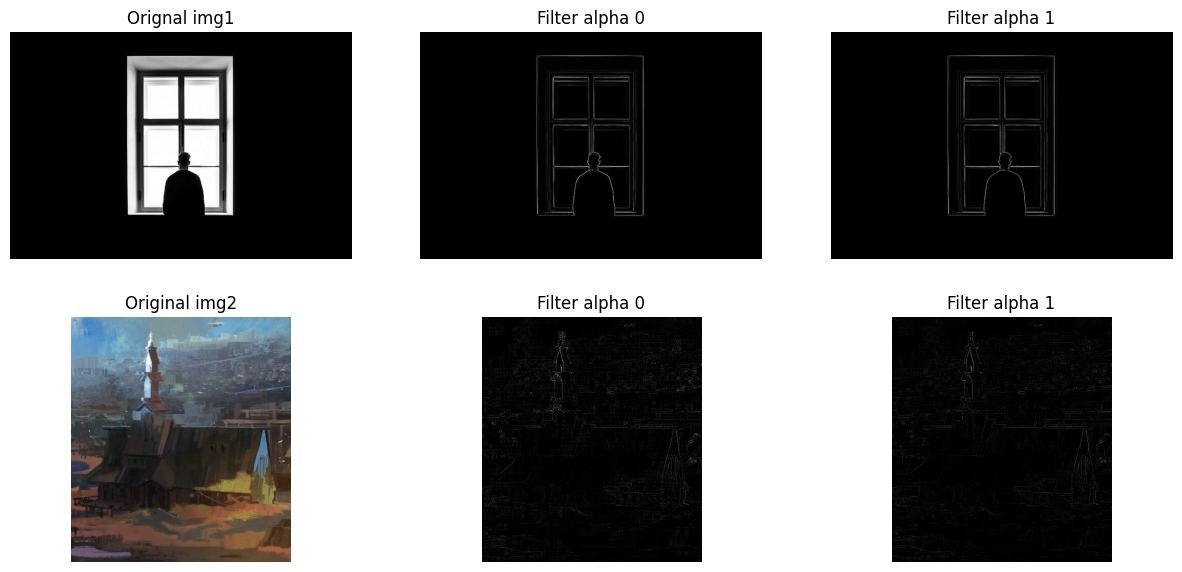

In [7]:
img1 = cv.imread("window_man.jpg",cv.IMREAD_GRAYSCALE)
img2 = cv.imread("elysium.jpg")

img2 = img2[460:940,1260:1690]

img1_fa0 = cv.filter2D(img1,ddepth=-1,kernel=fa0)
img1_fa1 = cv.filter2D(img1,ddepth=-1,kernel=fa1)

img2_fa0 = cv.filter2D(img2,ddepth=-1,kernel=fa0)
img2_fa1 = cv.filter2D(img2,ddepth=-1,kernel=fa1)

plt.figure(figsize=(15,7))

plt.subplot(2,3,1)
plt.imshow(img1,cmap="gray")
plt.title('Orignal img1')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(img1_fa0,cmap="gray")
plt.title('Filter alpha 0')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(img1_fa1,cmap="gray")
plt.title('Filter alpha 1')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(img2)
plt.title('Original img2')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(img2_fa0)
plt.title('Filter alpha 0')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(img2_fa1)
plt.title('Filter alpha 1')
plt.axis('off')

plt.show()

# Conclusiones problema 3
Podemos observar como la unica información que nos muestran estos filtros, es una clara deteción de bordes.

# Problema 4
Para este problema aplicaremos el filtro general:
$$ 
\text{Filtro general} = \frac{1}{\beta+1}\times\left(\begin{matrix}
-\beta & \beta-1 & -\beta \\
\beta-1 & \beta+5 & \beta-1 \\
-\beta & \beta-1 & -\beta 
\end{matrix}\right) \quad\quad :\quad\text{dim(Filtro general)}=3\times3
$$

Usando los casos especiales $\beta=0,\beta=1$, tenemos:
$$ 
\text{f\_}_{\beta\text{0}} = \left(\begin{matrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0
\end{matrix}\right)
$$

$$ 
\text{f\_}_{\beta\text{1}} = \left(\begin{matrix}
-\frac{1}{2} & 0 & -\frac{1}{2} \\
0 & 3 & 0 \\
-\frac{1}{2} & 0 & -\frac{1}{2} 
\end{matrix}\right) 
$$

In [12]:
# creamos los filtros

fb0 = np.array([[0,-1,0],
                [-1,5,-1],
                [0,-1,0]
               ])

fb1 = np.array([[-1/2.0,0,-1/2.0],
                [0,3,0],
                [-1/2.0,0,-1/2.0]
               ])

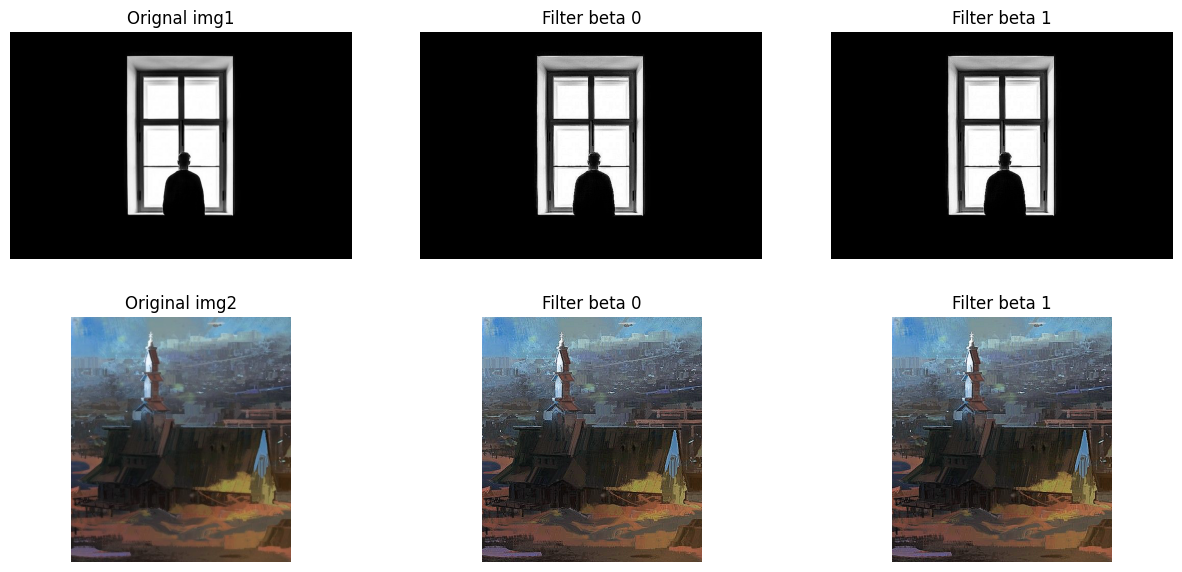

In [13]:
img1 = cv.imread("window_man.jpg",cv.IMREAD_GRAYSCALE)
img2 = cv.imread("elysium.jpg")

img2 = img2[460:940,1260:1690]

img1_fb0 = cv.filter2D(img1,ddepth=-1,kernel=fb0)
img1_fb1 = cv.filter2D(img1,ddepth=-1,kernel=fb1)

img2_fb0 = cv.filter2D(img2,ddepth=-1,kernel=fb0)
img2_fb1 = cv.filter2D(img2,ddepth=-1,kernel=fb1)

plt.figure(figsize=(15,7))

plt.subplot(2,3,1)
plt.imshow(img1,cmap="gray")
plt.title('Orignal img1')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(img1_fb0,cmap="gray")
plt.title('Filter beta 0')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(img1_fb1,cmap="gray")
plt.title('Filter beta 1')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(img2)
plt.title('Original img2')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(img2_fb0)
plt.title('Filter beta 0')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(img2_fb1)
plt.title('Filter beta 1')
plt.axis('off')

plt.show()

# Conclusión del problema 4
El filtro parece hacer la imagen un poco más clara, además de mejorar los bordes.

# Problema 5
Para este problema aplicaremos el filtro general:
$$ 
\text{Filtro general} = \left(\begin{matrix}
-1 & -1 & -1 \\
-1 & \gamma+8 & -1 \\
-1 & -1 & -1 
\end{matrix}\right) \quad\quad :\quad\text{dim(Filtro general)}=3\times3
$$

y los casos especificos: $\gamma=-2,-0.5,0.5,2$ 

In [23]:
# creamos los filtros


fg1 = np.array([[-1,-1,-1],
                [-1,6,-1],
                [-1,-1,-1]
               ])

fg2 = np.array([[-1,-1,-1],
                [-1,7.5,-1],
                [-1,-1,-1]
               ])

fg3 = np.array([[-1,-1,-1],
                [-1,8.5,-1],
                [-1,-1,-1]
               ])

fg4 = np.array([[-1,-1,-1],
                [-1,10,-1],
                [-1,-1,-1]
               ])

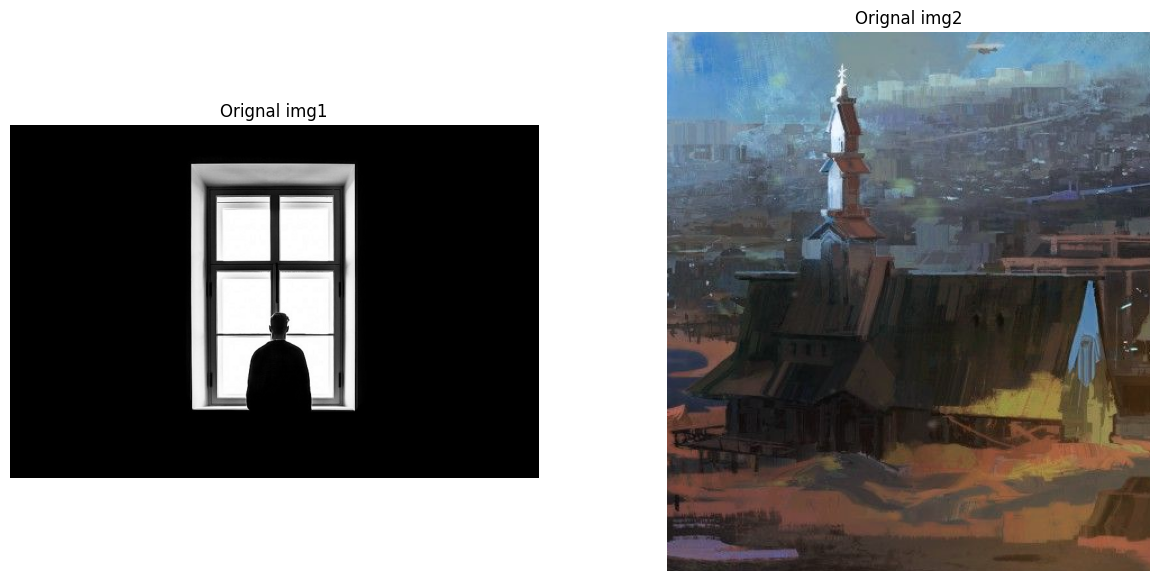

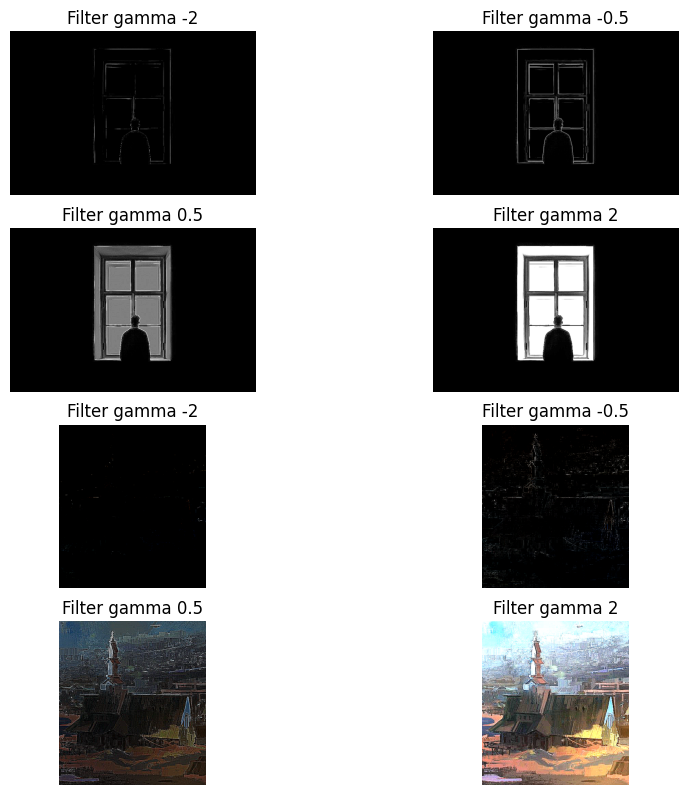

In [24]:
img1 = cv.imread("window_man.jpg",cv.IMREAD_GRAYSCALE)
img2 = cv.imread("elysium.jpg")

img2 = img2[460:940,1260:1690]

img1_fg1 = cv.filter2D(img1,ddepth=-1,kernel=fg1)
img1_fg2 = cv.filter2D(img1,ddepth=-1,kernel=fg2)
img1_fg3 = cv.filter2D(img1,ddepth=-1,kernel=fg3)
img1_fg4 = cv.filter2D(img1,ddepth=-1,kernel=fg4)

img2_fg1 = cv.filter2D(img2,ddepth=-1,kernel=fg1)
img2_fg2 = cv.filter2D(img2,ddepth=-1,kernel=fg2)
img2_fg3 = cv.filter2D(img2,ddepth=-1,kernel=fg3)
img2_fg4 = cv.filter2D(img2,ddepth=-1,kernel=fg4)

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.imshow(img1,cmap="gray")
plt.title('Orignal img1')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img2,cmap="gray")
plt.title('Orignal img2')
plt.axis('off')

plt.show()

plt.figure(figsize=(10,20))

plt.subplot(8,2,1)
plt.imshow(img1_fg1,cmap="gray")
plt.title('Filter gamma -2')
plt.axis('off')

plt.subplot(8,2,2)
plt.imshow(img1_fg2,cmap="gray")
plt.title('Filter gamma -0.5')
plt.axis('off')

plt.subplot(8,2,3)
plt.imshow(img1_fg3,cmap="gray")
plt.title('Filter gamma 0.5')
plt.axis('off')

plt.subplot(8,2,4)
plt.imshow(img1_fg4,cmap="gray")
plt.title('Filter gamma 2')
plt.axis('off')

plt.subplot(8,2,5)
plt.imshow(img2_fg1)
plt.title('Filter gamma -2')
plt.axis('off')

plt.subplot(8,2,6)
plt.imshow(img2_fg2)
plt.title('Filter gamma -0.5')
plt.axis('off')

plt.subplot(8,2,7)
plt.imshow(img2_fg3)
plt.title('Filter gamma 0.5')
plt.axis('off')

plt.subplot(8,2,8)
plt.imshow(img2_fg4)
plt.title('Filter gamma 2')
plt.axis('off')







plt.show()